In [ ]:
!pip install transformers==3.0.0

In [ ]:
import torch

if torch.cuda.is_available():     
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
except:
    print("Mounting Failed.")

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('drive/My Drive/DL-Final-Project/Dataset/Subset2_Preprocessed_NoHashtag.csv',  lineterminator='\n')

In [ ]:
pos_df = df[df['Labels'] == 1][:1306]
neg_df = df[df['Labels'] == -1]

In [ ]:
df = pd.concat((pos_df, neg_df))

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tweets = df.Tweets.values
labels = df.Labels.values
labels[labels==-1] = 0

In [ ]:
labels

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
import numpy as np
print(labels.mean())
freq = np.array(labels)
freq
zeros = np.where(freq == 0, 1, 0)
zeros = zeros.sum()
ones = np.where(freq == 1, 1, 0)
ones = ones.sum()

0.5


In [ ]:
sum(np.where(freq == 0, 1, 0))

1306

In [ ]:
max_len = 0

# For every sentence...
for tweet in tweets:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(tweet, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)
import torch
input_ids = []
attention_masks = []

# For every sentence...
for tweet in tweets:
    
    encoded_dict = tokenizer.encode_plus(
                        tweet,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 50,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', tweets[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was n

Max sentence length:  41


Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'only_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you may want to check this is the right behavior.
Truncation was n

Original:  fivepoints has one common element to crime guns      where are the people with  sctweets midlandsgov scpol   
Token IDs: tensor([  101,  2274, 26521,  2038,  2028,  2691,  5783,  2000,  4126,  4409,
         2073,  2024,  1996,  2111,  2007,  8040,  2102, 28394,  3215, 13256,
         3995,  2615,  8040, 18155,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.7 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

1,828 training samples
  784 validation samples


In [ ]:
for data in dataset:
  print(data[2])

tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
model_bert = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = True, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model_bert.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
optimizer = AdamW(model_bert.parameters(),
                  lr = 0.1, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 6

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import torch
import torch.nn as nn
from torch.nn import Parameter
from typing import Optional


class ClusterAssignment(nn.Module):
    def __init__(
        self,
        cluster_number: int,
        embedding_dimension: int,
        alpha: float = 1.0,
        cluster_centers: Optional[torch.Tensor] = None,
    ) -> None:
        """
        Module to handle the soft assignment, for a description see in 3.1.1. in Xie/Girshick/Farhadi,
        where the Student's t-distribution is used measure similarity between feature vector and each
        cluster centroid.
        :param cluster_number: number of clusters
        :param embedding_dimension: embedding dimension of feature vectors
        :param alpha: parameter representing the degrees of freedom in the t-distribution, default 1.0
        :param cluster_centers: clusters centers to initialise, if None then use Xavier uniform
        """
        super(ClusterAssignment, self).__init__()
        self.embedding_dimension = embedding_dimension
        self.cluster_number = cluster_number
        self.alpha = alpha
        if cluster_centers is None:
            initial_cluster_centers = torch.zeros(
                self.cluster_number, self.embedding_dimension, dtype=torch.float
            )
            nn.init.xavier_uniform_(initial_cluster_centers)
        else:
            initial_cluster_centers = cluster_centers
        self.cluster_centers = Parameter(initial_cluster_centers)

    def forward(self, batch: torch.Tensor) -> torch.Tensor:
        """
        Compute the soft assignment for a batch of feature vectors, returning a batch of assignments
        for each cluster.
        :param batch: FloatTensor of [batch size, embedding dimension]
        :return: FloatTensor [batch size, number of clusters]
        """
        norm_squared = torch.sum((batch.unsqueeze(1) - self.cluster_centers) ** 2, 2)
        numerator = 1.0 / (1.0 + (norm_squared / self.alpha))
        power = float(self.alpha + 1) / 2
        numerator = numerator ** power
        return numerator / torch.sum(numerator, dim=1, keepdim=True)

In [ ]:
import torch
import torch.nn as nn



class DEC(nn.Module):
    def __init__(
        self,
        cluster_number: int,
        hidden_dimension: int,
        encoder: torch.nn.Module,
        alpha: float = 1.0,
    ):
        """
        Module which holds all the moving parts of the DEC algorithm, as described in
        Xie/Girshick/Farhadi; this includes the AutoEncoder stage and the ClusterAssignment stage.
        :param cluster_number: number of clusters
        :param hidden_dimension: hidden dimension, output of the encoder
        :param encoder: encoder to use
        :param alpha: parameter representing the degrees of freedom in the t-distribution, default 1.0
        """
        super(DEC, self).__init__()
        self.encoder = encoder
        self.hidden_dimension = hidden_dimension
        self.cluster_number = cluster_number
        self.alpha = alpha
        self.assignment = ClusterAssignment(
            cluster_number, self.hidden_dimension, alpha
        )

    def forward(self, batch: torch.Tensor) -> torch.Tensor:
        """
        Compute the cluster assignment using the ClusterAssignment after running the batch
        through the encoder part of the associated AutoEncoder module.
        :param batch: [batch size, embedding dimension] FloatTensor
        :return: [batch size, number of clusters] FloatTensor
        """
        input_ids = batch[0]
        masks = batch[1]
        outputs = self.encoder(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask).detach()
        hidden_states = outputs[2][1:]
        token_embeddings = hidden_states[-1]
        token_embeddings = torch.squeeze(token_embeddings, dim=0)
        return self.assignment(token_embeddings)

In [ ]:
import numpy as np
import torch
from typing import Optional
from scipy.optimize import linear_sum_assignment


def cluster_accuracy(y_true, y_predicted, cluster_number: Optional[int] = None):
    """
    Calculate clustering accuracy after using the linear_sum_assignment function in SciPy to
    determine reassignments.
    :param y_true: list of true cluster numbers, an integer array 0-indexed
    :param y_predicted: list  of predicted cluster numbers, an integer array 0-indexed
    :param cluster_number: number of clusters, if None then calculated from input
    :return: reassignment dictionary, clustering accuracy
    """
    if cluster_number is None:
        cluster_number = (
            max(y_predicted.max(), y_true.max()) + 1
        )  # assume labels are 0-indexed
    count_matrix = np.zeros((cluster_number, cluster_number), dtype=np.int64)
    for i in range(y_predicted.size):
        count_matrix[y_predicted[i], y_true[i]] += 1

    row_ind, col_ind = linear_sum_assignment(count_matrix.max() - count_matrix)
    reassignment = dict(zip(row_ind, col_ind))
    accuracy = count_matrix[row_ind, col_ind].sum() / y_predicted.size
    return reassignment, accuracy


def target_distribution(batch: torch.Tensor) -> torch.Tensor:
    """
    Compute the target distribution p_ij, given the batch (q_ij), as in 3.1.3 Equation 3 of
    Xie/Girshick/Farhadi; this is used the KL-divergence loss function.
    :param batch: [batch size, number of clusters] Tensor of dtype float
    :return: [batch size, number of clusters] Tensor of dtype float
    """
    weight = (batch ** 2) / torch.sum(batch, 0)
    return (weight.t() / torch.sum(weight, 1)).t()

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import torch
import torch.nn as nn
from torch.utils.data.dataloader import DataLoader, default_collate
from typing import Tuple, Callable, Optional, Union
from tqdm import tqdm


def train(
    dataset: torch.utils.data.Dataset,
    model: torch.nn.Module,
    epochs: int,
    batch_size: int,
    optimizer: torch.optim.Optimizer,
    stopping_delta: Optional[float] = None,
    collate_fn=default_collate,
    cuda: bool = True,
    sampler: Optional[torch.utils.data.sampler.Sampler] = None,
    silent: bool = False,
    update_freq: int = 10,
    evaluate_batch_size: int = 8,
    update_callback: Optional[Callable[[float, float], None]] = None,
    epoch_callback: Optional[Callable[[int, torch.nn.Module], None]] = None,
) -> None:
    """
    Train the DEC model given a dataset, a model instance and various configuration parameters.
    :param dataset: instance of Dataset to use for training
    :param model: instance of DEC model to train
    :param epochs: number of training epochs
    :param batch_size: size of the batch to train with
    :param optimizer: instance of optimizer to use
    :param stopping_delta: label delta as a proportion to use for stopping, None to disable, default None
    :param collate_fn: function to merge a list of samples into mini-batch
    :param cuda: whether to use CUDA, defaults to True
    :param sampler: optional sampler to use in the DataLoader, defaults to None
    :param silent: set to True to prevent printing out summary statistics, defaults to False
    :param update_freq: frequency of batches with which to update counter, None disables, default 10
    :param evaluate_batch_size: batch size for evaluation stage, default 1024
    :param update_callback: optional function of accuracy and loss to update, default None
    :param epoch_callback: optional function of epoch and model, default None
    :return: None
    """
    static_dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        collate_fn=collate_fn,
        pin_memory=False,
        sampler=sampler,
        shuffle=False,
    )
    train_dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        collate_fn=collate_fn,
        sampler=sampler,
        shuffle=True,
    )
    data_iterator = tqdm(
        static_dataloader,
        leave=True,
        unit="batch",
        postfix={
            "epo": -1,
            "acc": "%.4f" % 0.0,
            "lss": "%.8f" % 0.0,
            "dlb": "%.4f" % -1,
        },
        disable=silent,
    )
    kmeans = KMeans(n_clusters=model.cluster_number, n_init=20)
    model.train()
    features = []
    actual = []
    # form initial cluster centres
    for index, batch in enumerate(data_iterator):
        if (isinstance(batch, tuple) or isinstance(batch, list)):
            b_input_ids = batch[0]
            b_input_mask = batch[1]
            b_labels = batch[2]
            batch = b_input_ids
            actual.append(b_labels)
        if cuda:
            batch = batch.cuda(non_blocking=True)
            b_input_mask = b_input_mask.cuda(non_blocking = True)
        outputs = model.encoder(batch, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask)
        hidden_states = outputs[1][1:]
        token_embeddings = hidden_states[-1]
        output = torch.squeeze(token_embeddings, dim=0)
        output = torch.mean(output, dim = 1)
        #output = torch.flatten(output, start_dim = 1, end_dim = 2)
        
        features.append(output.detach().cpu())
        del output, batch, b_input_mask, b_labels 


    actual = torch.cat(actual).long()
    predicted = kmeans.fit_predict(torch.cat(features).numpy())
    predicted_previous = torch.tensor(np.copy(predicted), dtype=torch.long)
    _, accuracy = cluster_accuracy(predicted, actual.cpu().numpy())
    cluster_centers = torch.tensor(
        kmeans.cluster_centers_, dtype=torch.float, requires_grad=True
    )
    if cuda:
        cluster_centers = cluster_centers.cuda(non_blocking=True)
    with torch.no_grad():
        # initialise the cluster centers
        model.state_dict()["assignment.cluster_centers"].copy_(cluster_centers)
    loss_function = nn.KLDivLoss(size_average=False)
    delta_label = None
    for epoch in range(epochs):
        features = []
        data_iterator = tqdm(
            train_dataloader,
            leave=True,
            unit="batch",
            postfix={
                "epo": epoch,
                "acc": "%.4f" % (accuracy or 0.0),
                "lss": "%.8f" % 0.0,
                "dlb": "%.4f" % (delta_label or 0.0),
            },
            disable=silent,
        )
        model.train()
        for index, batch in enumerate(data_iterator):
            if (isinstance(batch, tuple) or isinstance(batch, list)):
                b_input_ids = batch[0]
                b_input_mask = batch[1]
                batch = b_input_ids
                batch_mask = b_input_mask
            if cuda:
                batch = batch.cuda(non_blocking=True)
                batch_mask = batch_mask.cuda(non_blocking=True)
            outputs = model.encoder(batch, 
                                   token_type_ids=None, 
                                   attention_mask=batch_mask)
            hidden_states = outputs[1][1:]
            token_embeddings = hidden_states[-1]
            output = torch.squeeze(token_embeddings, dim=0)
            output = torch.mean(output, dim = 1)
            #output = torch.flatten(output, start_dim = 1, end_dim = 2)
            target = target_distribution(output).detach()
            loss = loss_function((output+.0001).log(), target) / output.shape[0]
            data_iterator.set_postfix(
                epo=epoch,
                acc="%.4f" % (accuracy or 0.0),
                lss="%.8f" % float(loss.item()),
                dlb="%.4f" % (delta_label or 0.0),
            )
            optimizer.zero_grad()
            loss.backward()
            optimizer.step(closure=None)
            outputs = model.encoder(batch, 
                                   token_type_ids=None, 
                                   attention_mask=batch_mask)
            hidden_states = outputs[1][1:]
            token_embeddings = hidden_states[-1]
            output = torch.squeeze(token_embeddings, dim=0)
            output = torch.mean(output, dim = 1)
            #output = torch.flatten(output, start_dim = 1, end_dim = 2)
            features.append(output.detach().cpu())
            if update_freq is not None and index % update_freq == 0:
                loss_value = float(loss.item())
                data_iterator.set_postfix(
                    epo=epoch,
                    acc="%.4f" % (accuracy or 0.0),
                    lss="%.8f" % loss_value,
                    dlb="%.4f" % (delta_label or 0.0),
                )
                if update_callback is not None:
                    update_callback(accuracy, loss_value, delta_label)
            del loss
        del features
        predicted, actual = predict(
            dataset,
            model,
            batch_size=evaluate_batch_size,
            collate_fn=collate_fn,
            silent=True,
            return_actual=True,
            cuda=cuda,
        )
        delta_label = (
            float((predicted != predicted_previous).float().sum().item())
            / predicted_previous.shape[0]
        )
        if stopping_delta is not None and delta_label < stopping_delta:
            print(
                'Early stopping as label delta "%1.5f" less than "%1.5f".'
                % (delta_label, stopping_delta)
            )
            break
        predicted_previous = predicted
        _, accuracy = cluster_accuracy(predicted.cpu().numpy(), actual.cpu().numpy())
        data_iterator.set_postfix(
            epo=epoch,
            acc="%.4f" % (accuracy or 0.0),
            lss="%.8f" % 0.0,
            dlb="%.4f" % (delta_label or 0.0),
        )
        if epoch_callback is not None:
            epoch_callback(epoch, model)


def predict(
    dataset: torch.utils.data.Dataset,
    model: torch.nn.Module,
    batch_size: int = 8,
    collate_fn=default_collate,
    cuda: bool = True,
    silent: bool = False,
    return_actual: bool = False,
) -> Union[Tuple[torch.Tensor, torch.Tensor], torch.Tensor]:
    """
    Predict clusters for a dataset given a DEC model instance and various configuration parameters.
    :param dataset: instance of Dataset to use for training
    :param model: instance of DEC model to predict
    :param batch_size: size of the batch to predict with, default 1024
    :param collate_fn: function to merge a list of samples into mini-batch
    :param cuda: whether CUDA is used, defaults to True
    :param silent: set to True to prevent printing out summary statistics, defaults to False
    :param return_actual: return actual values, if present in the Dataset
    :return: tuple of prediction and actual if return_actual is True otherwise prediction
    """
    dataloader = DataLoader(
        dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=False
    )
    data_iterator = tqdm(dataloader, leave=True, unit="batch", disable=silent,)
    features = []
    actual = []
    model.eval()
    for batch in data_iterator:
        if (isinstance(batch, tuple) or isinstance(batch, list)):
            b_input_ids = batch[0]
            b_input_mask = batch[1]
            b_labels = batch[2]
            batch = b_input_ids
            batch_mask = b_input_mask
            value = b_labels
            if return_actual:
                actual.append(value)
        elif return_actual:
            raise ValueError(
                "Dataset has no actual value to unpack, but return_actual is set."
            )
        if cuda:
            batch = batch.cuda(non_blocking=True)
            batch_mask = batch_mask.cuda(non_blocking = True)

        outputs = model.encoder(batch, 
                                   token_type_ids=None, 
                                   attention_mask=batch_mask)
        hidden_states = outputs[1][1:]
        token_embeddings = hidden_states[-1]
        output = torch.squeeze(token_embeddings, dim=0)
        output = torch.mean(output, dim = 1)
        #output = torch.flatten(output, start_dim = 1, end_dim = 2)
        features.append(
            output.detach().cpu()
        )  # move to the CPU to prevent out of memory on the GPU
    if return_actual:
        print(torch.cat(features).max(1)[1])
        return torch.cat(features).max(1)[1], torch.cat(actual).long()
    else:
        print(torch.cat(features).max(1)[1])
        return torch.cat(features).max(1)[1]

In [ ]:
cuda = True

  0%|          | 1/229 [00:00<00:22,  9.96batch/s, acc=0.0000, dlb=-1.0000, epo=-1, lss=0.00000000]

DEC stage.


100%|██████████| 229/229 [00:16<00:00, 14.16batch/s, acc=0.0000, dlb=-1.0000, epo=-1, lss=0.00000000]
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
  0%|          | 0/229 [00:00<?, ?batch/s, acc=0.5038, dlb=1.0000, epo=1, lss=nan]       

tensor([517, 517, 517,  ..., 517, 517, 517])


100%|██████████| 229/229 [01:09<00:00,  3.30batch/s, acc=0.5038, dlb=1.0000, epo=1, lss=nan]


tensor([517, 517, 517,  ..., 517, 517, 517])
Early stopping as label delta "0.00000" less than "0.00000".
tensor([517, 517, 517,  ..., 517, 517, 517])
Final DEC accuracy: 0.5038293216630197
Writing out confusion diagram with UUID: 70b28e944d67450da80dc1df530f97eb


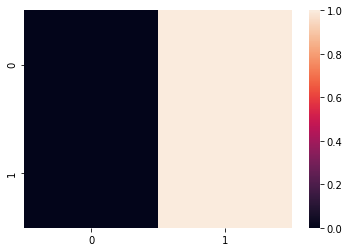

In [ ]:
import click
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from torch.optim import SGD
from torch.optim.lr_scheduler import StepLR
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from torchvision.datasets import MNIST
import uuid

#from ptdec.dec import DEC
#from ptdec.model import train, predict
#from ptsdae.sdae import StackedDenoisingAutoEncoder
#import ptsdae.model as ae
#from ptdec.utils import cluster_accuracy

def main(cuda, batch_size, testing_mode):
    # callback function to call during training, uses writer from the scope
    def training_callback(epoch, lr, loss, validation_loss):
        writer.add_scalars(
            "data/autoencoder",
            {"lr": lr, "loss": loss, "validation_loss": validation_loss,},
            epoch,
        )

    ds_train = train_dataset
    ds_val = val_dataset
    '''
    print("Pretraining stage.")
    ae.pretrain(
        ds_train,
        autoencoder,
        cuda=cuda,
        validation=ds_val,
        epochs=pretrain_epochs,
        batch_size=batch_size,
        optimizer=lambda model: SGD(model.parameters(), lr=0.1, momentum=0.9),
        scheduler=lambda x: StepLR(x, 100, gamma=0.1),
        corruption=0.2,
    )
    print("Training stage.")
    ae_optimizer = SGD(params=autoencoder.parameters(), lr=0.1, momentum=0.9)
    ae.train(
        ds_train,
        autoencoder,
        cuda=cuda,
        validation=ds_val,
        epochs=finetune_epochs,
        batch_size=batch_size,
        optimizer=ae_optimizer,
        scheduler=StepLR(ae_optimizer, 100, gamma=0.1),
        corruption=0.2,
        update_callback=training_callback,
    )
    '''
    print("DEC stage.")
    model = DEC(cluster_number=4, hidden_dimension=768, encoder=model_bert)
    if cuda:
        model.cuda()
    dec_optimizer = optimizer
    train(
        dataset=ds_train,
        model=model,
        epochs=10,
        batch_size=8,
        optimizer=dec_optimizer,
        stopping_delta=0.000001,
        cuda=cuda
    )
    predicted, actual = predict(
        ds_train, model, 8, silent=True, return_actual=True, cuda=cuda
    )
    actual = actual.cpu().numpy()
    predicted = predicted.cpu().numpy()
    reassignment, accuracy = cluster_accuracy(actual, predicted)
    print("Final DEC accuracy: %s" % accuracy)
    if not testing_mode:
        predicted_reassigned = [
            reassignment[item] for item in predicted
        ]  # TODO numpify
        confusion = confusion_matrix(actual, predicted_reassigned)
        normalised_confusion = (
            confusion.astype("float") / confusion.sum(axis=1)[:, np.newaxis]
        )
        confusion_id = uuid.uuid4().hex
        sns.heatmap(normalised_confusion).get_figure().savefig(
            "confusion_%s.png" % confusion_id
        )
        print("Writing out confusion diagram with UUID: %s" % confusion_id)

main(True, 8, False)

In [ ]:
for val in val_dataset:
  print(val[2])

tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)
tensor(1)
tensor(0)
tensor(1)
